In [30]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [37]:
# evaluation
def evaluation(model):
    model.fit(X_train, y_train)

    y_pred = forest.predict(X_test)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/len(X_train.columns)))

# reduce dimension    
def reduce_dimension(X, dim):
    # StandardScaler
    sc = StandardScaler(copy=True, with_mean=True, with_std=True)
    Z = sc.fit_transform(X)
    # PCA
    pca = PCA(n_components=dim, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=1)
    X_pca = pd.DataFrame(pca.fit_transform(X) )#, columns=['pc1','pc2'])
    return X_pca


In [32]:
# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(data=X, columns=init_data['feature_names'])
y = pd.DataFrame(data=y, columns=['label'])
y = np.array(y).reshape(y.shape[0], )

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print ("size of dataset  :", X.shape[0])
print ("size of features :", X.shape[1])
print ('size of training :', X_train.shape[0])
print ('size of testing  :', X_test.shape[0])


size of dataset  : 569
size of features : 30
size of training : 398
size of testing  : 171


In [33]:
# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
evaluation(model=forest)

Accuracy: 0.98
Accuracy per feature: 0.03


 1) worst concave points           0.141849
 2) mean concave points            0.117697
 3) worst radius                   0.110919
 4) worst perimeter                0.105243
 5) mean concavity                 0.077163
 6) worst area                     0.073364
 7) area error                     0.041760
 8) mean perimeter                 0.036943
 9) mean radius                    0.035625
10) worst concavity                0.035205
11) mean area                      0.032890
12) worst texture                  0.022736
13) mean texture                   0.018584
14) worst compactness              0.016786
15) radius error                   0.015408
16) worst symmetry                 0.014770
17) worst smoothness               0.014235
18) mean compactness               0.010085
19) perimeter error                0.010040
20) worst fractal dimension        0.009015
21) concave points error           0.008085
22) compactness error              0.007420
23) mean smoothness             

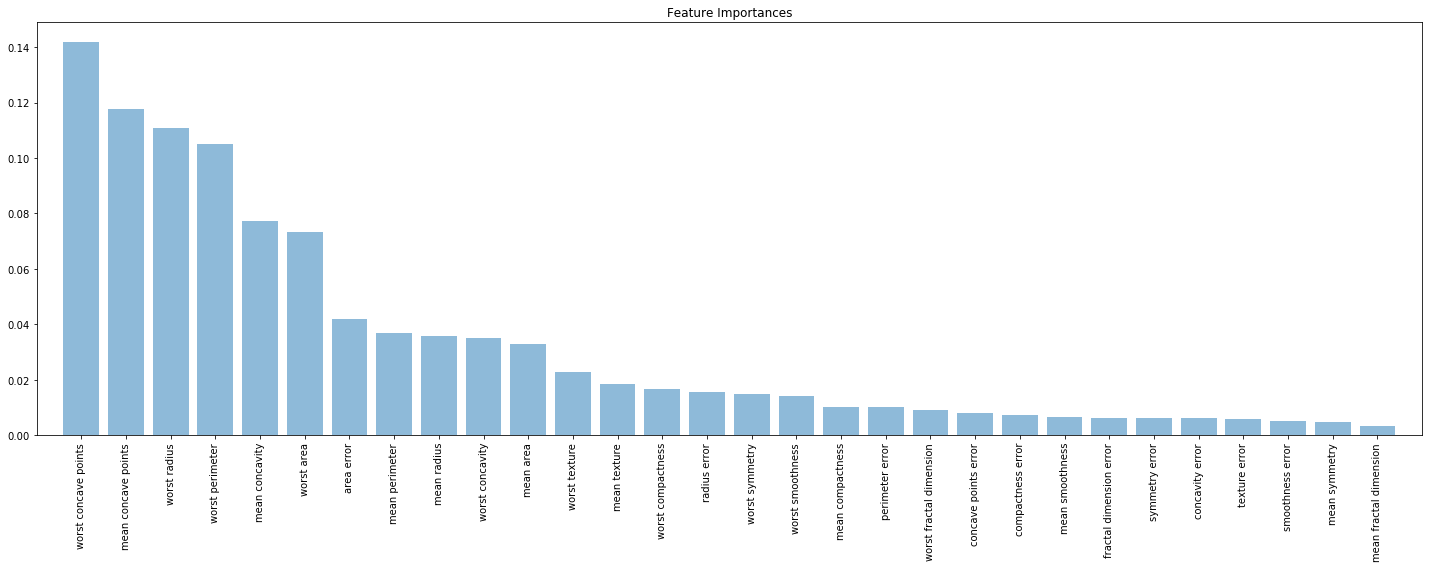

In [34]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize=(20, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X[["worst concave points", "mean concave points"]], y, test_size=0.3, random_state=0)
evaluation(model=forest)


Accuracy: 0.89
Accuracy per feature: 0.44


In [39]:
for i in range(1, 5): #X.shape[1]
    print ("reduce dimension to ", str(i))
    X_pca = reduce_dimension(X=X, dim=i)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)
    evaluation(model=forest)
    print ("========================")


reduce dimension to  1
Accuracy: 0.84
Accuracy per feature: 0.84
reduce dimension to  2
Accuracy: 0.95
Accuracy per feature: 0.47
reduce dimension to  3
Accuracy: 0.95
Accuracy per feature: 0.32
reduce dimension to  4
Accuracy: 0.96
Accuracy per feature: 0.24


In [35]:
# reduce dimension
X_pca = reduce_dimension(X, 2)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# evaluation
evaluation(model=forest)

Accuracy: 0.95
Accuracy per feature: 0.47


> 使用random forest找出的兩個重要變數，建立新的random forest模型，得到的結果為0.89正確率，每個變數的正確率為0.44  
而如果使用pca降到2維，可以得到0.95正確率，每個變數的正確率為0.47。  
由此可知道pca的效果比較好，在同樣維度下有較高的正確率。